In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\Users\ashu\Downloads\files dataset\Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.drop(["PassengerId", "Cabin"], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [16]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
data.drop(['Name', 'Ticket'], axis= 1, inplace = True)

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
data['Sex'].nunique()

2

In [38]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
x = pd.get_dummies(data['Sex'])
x

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
data = pd.concat([data,x], axis = 1)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'female', 'male'],
      dtype='object')

In [34]:
data.drop(['Sex'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [35]:
from sklearn .preprocessing import LabelEncoder
le = LabelEncoder()
data['embarked_le'] = le.fit_transform(data['Embarked'])


In [36]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,embarked_le
0,0,3,22.0,1,0,7.2500,S,0,1,2
1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,0,2
3,1,1,35.0,1,0,53.1000,S,1,0,2
4,0,3,35.0,0,0,8.0500,S,0,1,2


In [39]:
data.drop(['female', 'Embarked'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,embarked_le
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [40]:
remaining_columns = list(data.columns)
remaining_columns.remove('Survived')

In [42]:
X = data[remaining_columns].values
y = data['Survived'].values.astype(np.uint8)

In [43]:
X

array([[ 3.        , 22.        ,  1.        , ...,  7.25      ,
         1.        ,  2.        ],
       [ 1.        , 38.        ,  1.        , ..., 71.2833    ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  7.925     ,
         0.        ,  2.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ..., 23.45      ,
         0.        ,  2.        ],
       [ 1.        , 26.        ,  0.        , ..., 30.        ,
         1.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  7.75      ,
         1.        ,  1.        ]])

In [44]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

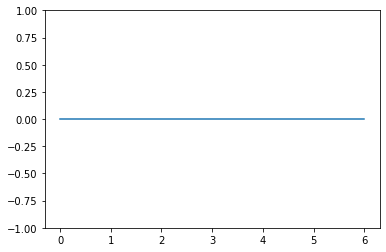

In [50]:
plt.ylim(-1,1)
mean = []
for i in range(X.shape[1]):
    mean.append(np.mean(Xtest[:, i]))
plt.plot(mean, scaley = False)

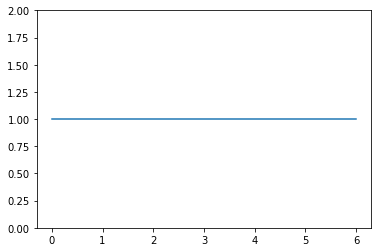

In [51]:
plt.ylim(0,2)
vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:, i]))
plt.plot(vars)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, ytrain)

C:\Users\ashu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model.score(Xtest, ytest)

0.8212290502793296

In [56]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,embarked_le
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [57]:
X = data.iloc[:,1:]
X

,Pclass,Age,SibSp,Parch,Fare,male,embarked_le
0,3,22.000000,1,0,7.2500,1,2
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,0,2
3,1,35.000000,1,0,53.1000,0,2
4,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,2
887,1,19.000000,0,0,30.0000,0,2
888,3,29.699118,1,2,23.4500,0,2
889,1,26.000000,0,0,30.0000,1,0


In [60]:
y = data.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [65]:
from sklearn.svm import SVC

In [66]:
svc_clf = SVC(kernel = 'linear')
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

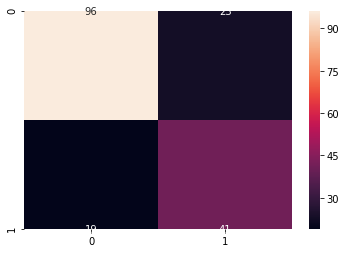

In [69]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [70]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7653631284916201
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       119
           1       0.64      0.68      0.66        60

    accuracy                           0.77       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.77      0.77       179



In [71]:
svc_clf_rbf = SVC(kernel = 'rbf')
svc_clf_rbf.fit(X_train, y_train)
y_pred = svc_clf_rbf.predict(X_test)

C:\Users\ashu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


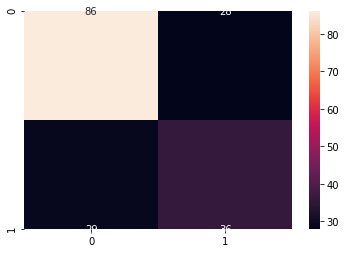

In [72]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [73]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.6815642458100558
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       114
           1       0.56      0.55      0.56        65

    accuracy                           0.68       179
   macro avg       0.66      0.65      0.65       179
weighted avg       0.68      0.68      0.68       179



In [74]:
svc_clf = SVC(kernel = 'sigmoid')
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

C:\Users\ashu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


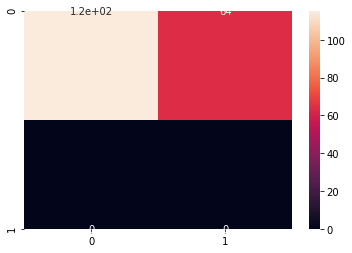

In [75]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [76]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.6424581005586593
              precision    recall  f1-score   support

           0       1.00      0.64      0.78       179
           1       0.00      0.00      0.00         0

    accuracy                           0.64       179
   macro avg       0.50      0.32      0.39       179
weighted avg       1.00      0.64      0.78       179



C:\Users\ashu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
